Customer Churn
It is when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.

Types of Customer Churn –

* Contractual Churn : When a customer is under a contract for a service and decides to cancel the service e.g. Cable TV, SaaS.
* Voluntary Churn : When a user voluntarily cancels a service e.g. Cellular connection.
* Non-Contractual Churn : When a customer is not under a contract for a service and decides to cancel the service e.g. Consumer Loyalty in retail stores.
* Involuntary Churn : When a churn occurs without any request of the customer e.g. Credit card expiration.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/churn.csv")
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

EDA on this dataset

In [12]:
#To find out number of churns and non churns
print(df['class'].value_counts())

class
0    4293
1     707
Name: count, dtype: int64


* 0 means non churn
* 1 means churns

In [11]:
# To find out who makes more customer service calls churns or non churns
print(df.groupby('class')['number_customer_service_calls'].mean())

class
0    1.457722
1    2.254597
Name: number_customer_service_calls, dtype: float64


Churns make more customer service calls than non churns

In [17]:
#To find churns and non churns in every state

print(df.groupby('state')['class'].value_counts())

state  class
0      0         67
       1          5
1      0        111
       1         13
2      0         76
               ... 
48     1          8
49     0        136
       1         22
50     0        104
       1         11
Name: count, Length: 102, dtype: int64


We have a total of 51 states and each state's churns and non churns are displayed

---

Exploring Data Visualizations

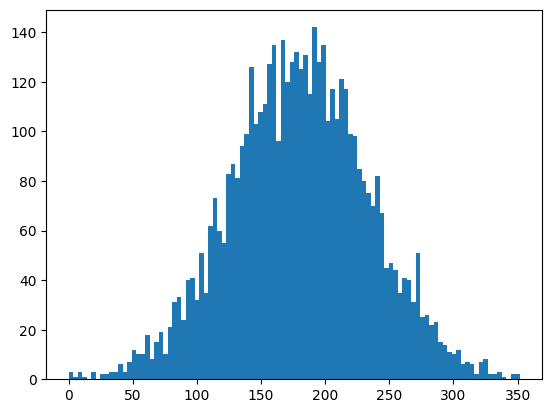

In [22]:
#To understand how variables are distributed

import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['total_day_minutes'], bins = 100)
plt.show()

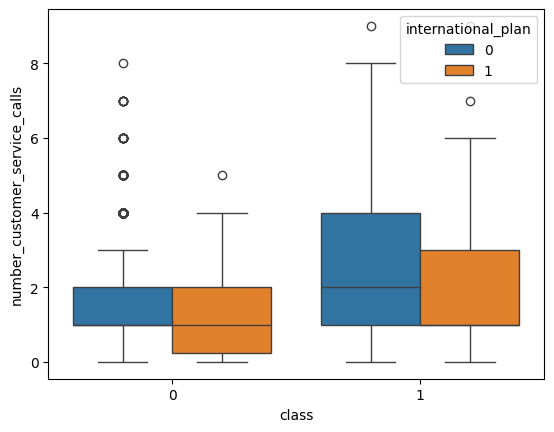

In [27]:
sns.boxplot(x = 'class', y = 'number_customer_service_calls', data = df,
           hue = "international_plan")
plt.show()

* Customers who do churn end up leaving more customer service calls
* But for the customer who have international plans leave fewer calls

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

All comuns are in numerical format so we don't have to change type of any column.

In [29]:
df.isnull().sum()

,0
state,0
account_length,0
area_code,0
phone_number,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0


It has no null values so we don't neet to fill anything either.

---
Distribute data in x and y axis for model building


In [43]:
# Separating Dependent and independent variables

x = df.iloc[:,0:19].values
y = df.iloc[:,20].values

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [47]:
#Now standardize the value using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [52]:
# Model Building: trian Random Forest Classifier on the training set

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
#Now make prediction on test data

y_pred_test = clf.predict(x_test)

In [63]:
#Evaluate the model

#Checking accuracy on test set

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_test))

0.936


In [64]:
#Checking accuracy on training set
y_pred_train = clf. predict(x_train)
print(accuracy_score(y_train, y_pred_train))

0.99975


So on training data we are getting an accuracy score of 99.97% and on testing data the accuracy score is 93.6%, Hence we can conclude that the model is an excellent model

In [65]:
# Additional finding confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))

[[845   6]
 [ 58  91]]


In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred_train))

[[3442    0]
 [   1  557]]


In [67]:
# TO fiind additional things related to confusion matrix use the below information

# True Positives(TP) = 91
# True Negatives(TN) = 845
# False Positives(FP) = 6
# False Negatives(FN) = 58
# Precision = TP/(TP+FP) = 0.93
# Recall = TP/(TP+FN) = 0.61
# Accuracy = (TP+TN)/(TP+TN+FP+FN) = 0.936  (You can relate this value from above model evaluation)

Thank you for going through my work till the end I hope you have a wonderful day and feel free to get in touch if you have any questions about my work.